<a href="https://colab.research.google.com/github/tousifo/ml_notebooks/blob/main/Solution_meme_search_tousif_bin_parves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Get memes
import os
import requests

# Create directory
save_dir = "content/memes"
os.makedirs(save_dir, exist_ok=True)

# List of image URLs
image_urls = [
    "https://ml-hiring.fringecore.sh/meme_search/meme_1.png",
    "https://ml-hiring.fringecore.sh/meme_search/meme_2.webp",
    "https://ml-hiring.fringecore.sh/meme_search/meme_3.jpg",
    "https://ml-hiring.fringecore.sh/meme_search/meme_4.jpg",
    "https://ml-hiring.fringecore.sh/meme_search/meme_5.jpg"
]

# Download each image
for url in image_urls:
    filename = os.path.join(save_dir, url.split("/")[-1])
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")


Downloaded content/memes/meme_1.png
Downloaded content/memes/meme_2.webp
Downloaded content/memes/meme_3.jpg
Downloaded content/memes/meme_4.jpg
Downloaded content/memes/meme_5.jpg


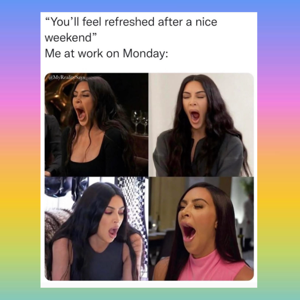

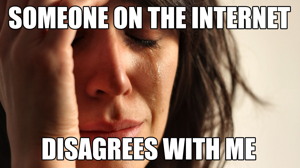

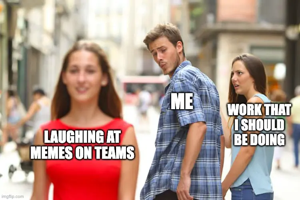

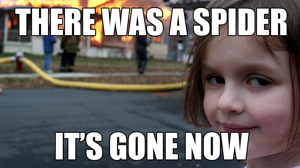

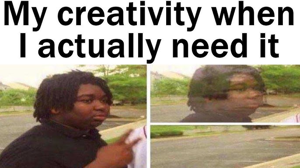

In [2]:
# @title Display All Memes
from IPython.display import display
from PIL import Image
for filename in os.listdir('content/memes'):
  if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')):
    img_path = os.path.join('content/memes', filename)
    try:
      img = Image.open(img_path)
      display(img.resize((300, int(300 * img.height / img.width))))
    except Exception as e:
      print(f"Could not display image {img_path}: {e}")

# Function to Implement

In [3]:
# ─── Snippet 1: Install & Load CLIP ───────────────────────────
!pip install -q transformers torch torchvision

from transformers import CLIPProcessor, CLIPModel
import torch

# load the CLIP model & processor (runs on CPU or GPU if available)
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# helper: cosine-normalize a tensor
def normalize(x):
    return x / x.norm(p=2, dim=-1, keepdim=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
# ─── Snippet 2: Ingest & Embed All Memes ────────────────────────
import os
from PIL import Image

# point to your download folder
IMAGE_DIR = "content/memes"
image_paths = [
    os.path.join(IMAGE_DIR, fn)
    for fn in os.listdir(IMAGE_DIR)
    if fn.lower().endswith((".jpg",".jpeg",".png",".webp"))
]

# load & batch-encode
images = [Image.open(p).convert("RGB") for p in image_paths]
inputs = processor(images=images, return_tensors="pt", padding=True)
with torch.no_grad():
    image_embs = model.get_image_features(**inputs)
image_embs = normalize(image_embs)   # shape: (N_images, D)

In [5]:
# ─── Snippet 3: Fill search_images() & Eval ────────────────────
from IPython.display import display

def search_images(query: str, top_k: int = 5):
    # 1) text → embedding
    text_inputs = processor(text=[query], return_tensors="pt", padding=True)
    with torch.no_grad():
        text_emb = model.get_text_features(**text_inputs)
    text_emb = normalize(text_emb)      # shape: (1, D)

    # 2) cosine similarities
    #    (N_images x D) @ (D x 1) → (N_images,)
    sims = (image_embs @ text_emb.T).squeeze(1)
    topk_idxs = sims.topk(top_k).indices.tolist()

    # 3) display & return
    top_result_path = []
    for idx in topk_idxs:
        img_path = image_paths[idx]
        top_result_path.append(img_path)
        display(Image.open(img_path).resize((400, 400)))
    return top_result_path

# Eval

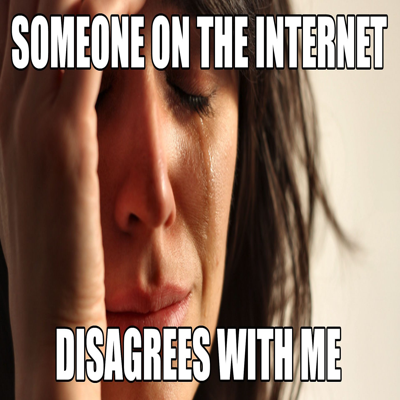

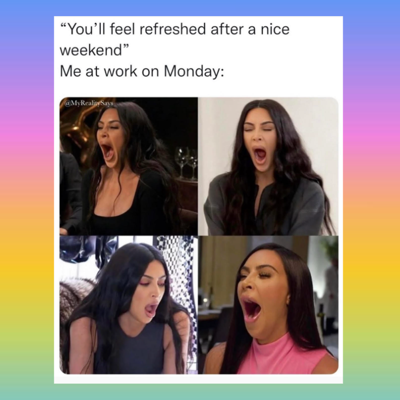

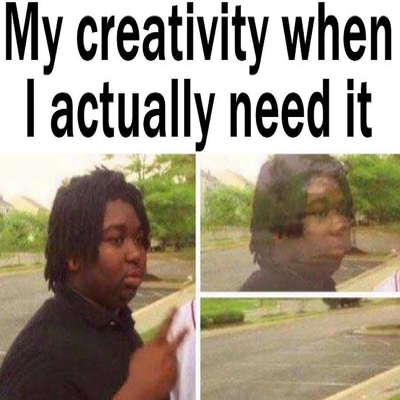

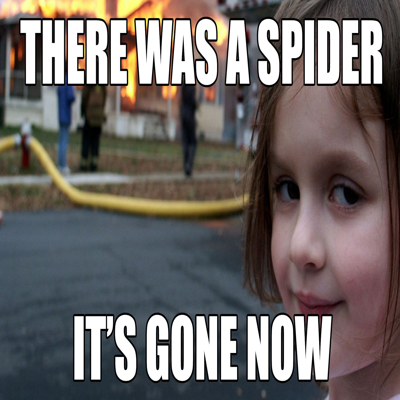

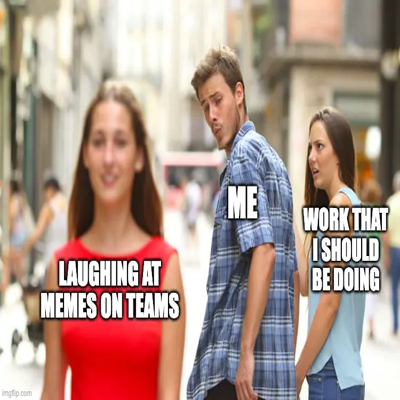

Search Results: ['content/memes/meme_5.jpg', 'content/memes/meme_1.png', 'content/memes/meme_3.jpg', 'content/memes/meme_4.jpg', 'content/memes/meme_2.webp']


In [6]:
# @title Search Memes
query = "girl crying" # @param {"type":"string","placeholder":"girl crying"}
results = search_images(query)
print("Search Results:", results)